# K Nearest Neighbors

## Predicting the Character

In [25]:
#Importing necessary Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

#Import Naive Bayes 
from sklearn.neighbors import KNeighborsClassifier

#Other libraries needed 
from sklearn.metrics import (plot_confusion_matrix, accuracy_score, classification_report)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

In [2]:
#import the dataset
friends = pd.read_csv('../../Datasets/friends-modeling.csv')
friends.head()

,season,episode,character,dialogue
0,s01,e01,Monica Geller,There's nothing to tell! He's just some guy I ...
1,s01,e01,Joey Tribbiani,"C'mon, you're going out with the guy! There's ..."
2,s01,e01,Chandler Bing,"All right Joey, be nice. So does he have a hum..."
3,s01,e01,Phoebe Buffay,"Wait, does he eat chalk?"
4,s01,e01,Phoebe Buffay,"Just, 'cause, I don't want her to go through w..."


In [3]:
#Make sure no nulls
friends.isnull().sum()

season       0
episode      0
character    0
dialogue     0
dtype: int64

### Make X and y values 

In [4]:
X = friends['dialogue']
y = friends['character']

### Split into Train and Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [6]:
X_train.shape

(33604,)

In [7]:
y_train.shape

(33604,)

In [8]:
X_test.shape

(11202,)

In [9]:
y_test.shape

(11202,)

### Baseline Accuracy 

In [10]:
y_train.value_counts(normalize=True)

Rachel Green      0.177657
Ross Geller       0.177152
Chandler Bing     0.169355
Monica Geller     0.167242
Joey Tribbiani    0.160725
Phoebe Buffay     0.147869
Name: character, dtype: float64

### Making a Pipeline for the GridSearch Using CountVectorizer

In [17]:
pipe = Pipeline(steps=[('cv', CountVectorizer()),
                      ('knn', KNeighborsClassifier())])

### Modeling the KNN Using GridSearch and Default Parameters

In [18]:
grid_d = {'cv__stop_words': [None, 'english'],
         'cv__min_df': [0, 1, 2]}

In [19]:
gs_d = GridSearchCV(estimator=pipe, param_grid=grid_d)
gs_d.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cv__min_df': [0, 1, 2],
                         'cv__stop_words': [None, 'english']})

In [20]:
gs_d.best_params_

{'cv__min_df': 2, 'cv__stop_words': 'english'}

In [21]:
gs_d.score(X_train, y_train), gs_d.score(X_test, y_test)

(0.43078204975598144, 0.21112301374754508)

In [31]:
gs_d.best_score_

0.20690993846578953

In [23]:
preds_d = gs_d.predict(X_test)

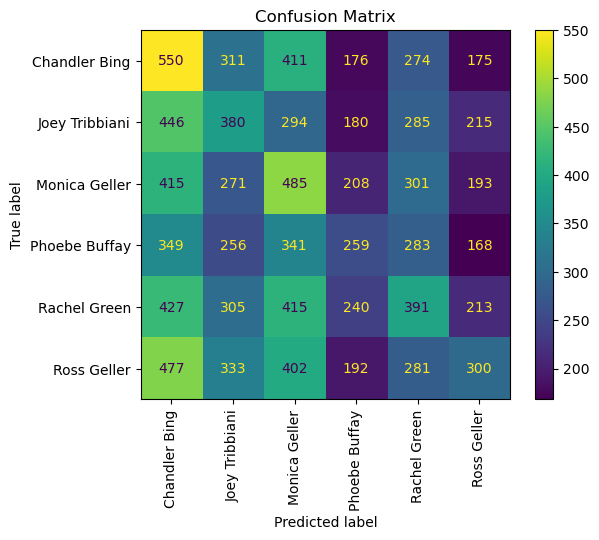

In [32]:
plot_confusion_matrix(estimator=gs_d, X = X_test, y_true=y_test)
plt.xticks(rotation = 90)
plt.title('Confusion Matrix')
plt.show()

In [27]:
knn_d = pd.DataFrame(y_test)

knn_d['predictions'] = preds_d

knn_d['dialogue'] = X_test

knn_d.rename(columns={'character': 'actual'}, inplace=True)
knn_d.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Joey Tribbiani,Then what's the problem?
12970,Phoebe Buffay,Ross Geller,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Monica Geller,What? What? He's interested in you. He-he like...
22017,Monica Geller,Chandler Bing,I've never loved anybody as much as I love you.
5611,Rachel Green,Chandler Bing,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Rachel Green,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Phoebe Buffay,Great. So the ball is in his court?
23737,Monica Geller,Rachel Green,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Ross Geller,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Monica Geller,How are you?


In [29]:
knn_d[knn_d['actual'] != knn_d['predictions']].count()

actual         8837
predictions    8837
dialogue       8837
dtype: int64

In [30]:
knn_d[knn_d['actual'] == knn_d['predictions']].count()

actual         2365
predictions    2365
dialogue       2365
dtype: int64

### With Parameter Tuning

In [34]:
grid_1 = {'cv__stop_words':[None, 'english'],
        'cv__min_df': [0, 1, 2, 3, 4, 5, 6],
        'knn__n_neighbors': [5, 7, 9, 11, 13]
       }

In [35]:
gs_1 = GridSearchCV(pipe, param_grid= grid_1)
gs_1.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cv__min_df': [0, 1, 2, 3, 4, 5, 6],
                         'cv__stop_words': [None, 'english'],
                         'knn__n_neighbors': [5, 7, 9, 11, 13]})

In [36]:
gs_1.best_params_

{'cv__min_df': 3, 'cv__stop_words': 'english', 'knn__n_neighbors': 13}

In [37]:
gs_1.score(X_train, y_train), gs_1.score(X_test, y_test)

(0.3445423163909058, 0.2029101946081057)

In [38]:
preds_1 = gs_1.predict(X_test)

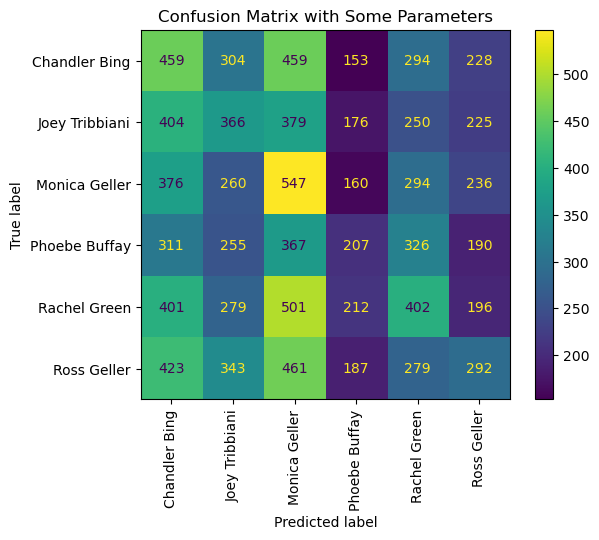

In [41]:
plot_confusion_matrix(estimator= gs_1, X= X_test, y_true= y_test)
plt.xticks(rotation = 90)
plt.title("Confusion Matrix with Some Parameters")
plt.show()

In [42]:
knn_1 = pd.DataFrame(y_test)

knn_1['predictions'] = preds_1

knn_1['dialogue'] = X_test

knn_1.rename(columns={'character': 'actual'}, inplace=True)
knn_1.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Ross Geller,Then what's the problem?
12970,Phoebe Buffay,Rachel Green,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Chandler Bing,What? What? He's interested in you. He-he like...
22017,Monica Geller,Monica Geller,I've never loved anybody as much as I love you.
5611,Rachel Green,Chandler Bing,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Ross Geller,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Chandler Bing,Great. So the ball is in his court?
23737,Monica Geller,Monica Geller,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Ross Geller,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Monica Geller,How are you?


In [43]:
knn_1[knn_1['actual'] != knn_1['predictions']].count()

actual         8929
predictions    8929
dialogue       8929
dtype: int64

In [44]:
knn_1[knn_1['actual'] == knn_1['predictions']].count()

actual         2273
predictions    2273
dialogue       2273
dtype: int64

#### Another try!

In [45]:
grid_2 = {'cv__stop_words':[None, 'english'],
        'cv__min_df': [0, 1, 2, 3, 4, 5, 6],
        'knn__n_neighbors': [13, 15, 17, 19, 21, 23, 25]
       }

In [46]:
gs_2 = GridSearchCV(estimator=pipe, param_grid= grid_2)
gs_2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cv__min_df': [0, 1, 2, 3, 4, 5, 6],
                         'cv__stop_words': [None, 'english'],
                         'knn__n_neighbors': [13, 15, 17, 19, 21, 23, 25]})

In [47]:
gs_2.best_params_

{'cv__min_df': 3, 'cv__stop_words': 'english', 'knn__n_neighbors': 21}

In [48]:
gs_2.score(X_train, y_train), gs_2.score(X_test, y_test)

(0.31064754195929056, 0.2054990180324942)

In [49]:
gs_2.classes_

array(['Chandler Bing', 'Joey Tribbiani', 'Monica Geller',
       'Phoebe Buffay', 'Rachel Green', 'Ross Geller'], dtype=object)

In [51]:
preds_2 = gs_2.predict(X_test)

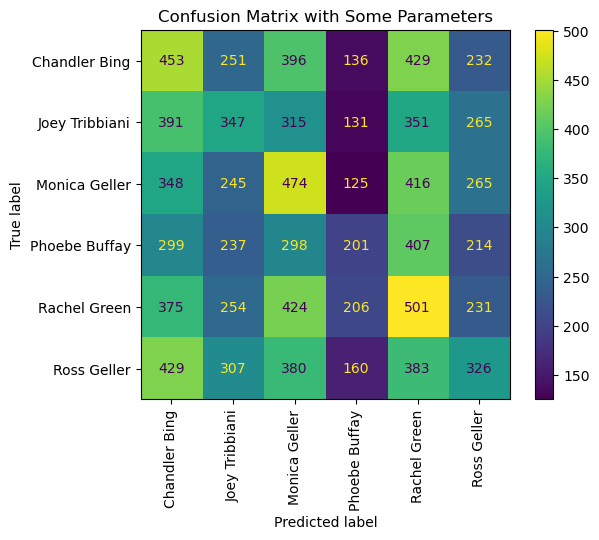

In [52]:
plot_confusion_matrix(estimator= gs_2, X= X_test, y_true= y_test)
plt.xticks(rotation = 90)
plt.title("Confusion Matrix with Some Parameters")
plt.show()

In [53]:
knn_2 = pd.DataFrame(y_test)

knn_2['predictions'] = preds_2

knn_2['dialogue'] = X_test

knn_2.rename(columns={'character': 'actual'}, inplace=True)
knn_2.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Chandler Bing,Then what's the problem?
12970,Phoebe Buffay,Joey Tribbiani,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Monica Geller,What? What? He's interested in you. He-he like...
22017,Monica Geller,Monica Geller,I've never loved anybody as much as I love you.
5611,Rachel Green,Monica Geller,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Joey Tribbiani,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Chandler Bing,Great. So the ball is in his court?
23737,Monica Geller,Chandler Bing,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Ross Geller,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Rachel Green,How are you?
